# Kaggle Titanic competition

Author: Julian Borbeck
04.04.2021



## Exploratory Data analysis

EDA was performed on the Train.csv data obtatined from the Kaggle Titanic competition (https://www.kaggle.com/c/titanic).


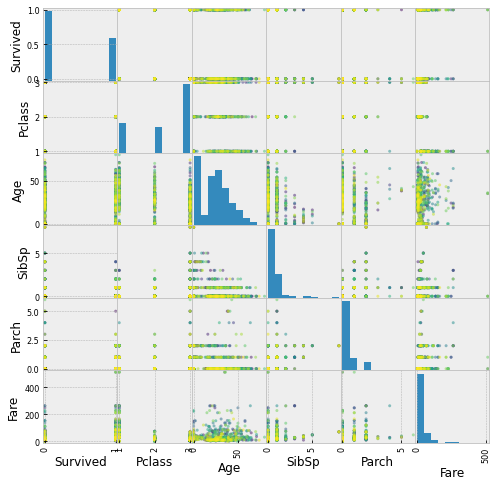

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh')
data = pd.read_csv("train.csv")

#replace NaN with 0 for EDA

data_vis = data.fillna(0)
y = data_vis["PassengerId"]

del data_vis["PassengerId"]


# scatter matrix with Passenger ID as color scheme

plot = pd.plotting.scatter_matrix(data_vis,c=y,figsize =(8,8))

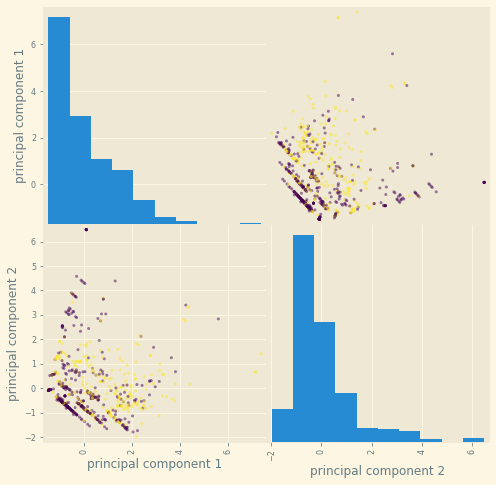

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

plt.style.use('Solarize_Light2')

#PCA

# standardize Data where it is appropriate (Age,SibSp,Parch,Fare,)
data1 = pd.DataFrame()

data1["Age"] = data["Age"]
data1["SibSp"] = data["SibSp"]
data1["Parch"] = data["Parch"]
data1["Fare"] = data["Fare"]
data1["Pclass"] = data["Pclass"]
#print(data1)
features = data1.fillna(0).values

#reduce to 2 components
pca = PCA(n_components=2)

features = StandardScaler().fit_transform(features)

PC = pca.fit_transform(features)



transformed = pd.DataFrame(data = PC, columns = ['principal component 1', 'principal component 2'])



plot = pd.plotting.scatter_matrix(transformed,c=data["Survived"],figsize =(8,8))

## Machine learning model

For this challenge a random forest model was implemented. Optimizations done: find optimal ammount of estimators, find optimal number of PCAs, which resulted in the model performing similarly with all features and only 2 features. Since computing time isnt an issue in this instance it was decided to use all available and suitable features. Sex and Port of origin were encoded using numerical encoding. A standard scaler normalization was applied. 
The AdaBoostClassifier and a Multilayer Perceptron were compared to the random forest. Random forest outperformed both models.
It was trained on 75% of the Dataset with 25% as validation.
Hyperparameter optimization was performed on the random forest model using Random Search Cross Validation.
The following parameters were identified as optimal:
{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}
 The random forest Model with n_Estimators = 325 was able to score 0.77272 on the Kaggle test dataset (https://www.kaggle.com/submissions/20336444/20336444.raw)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

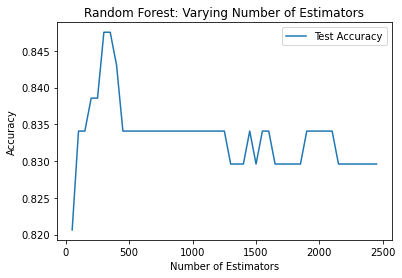

In [1]:
# random forest

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

estimators = np.arange(50, 2500,50)

test_accuracy = np.empty(len(estimators))

# create Datasets

data = pd.read_csv("train.csv").fillna(0)

print(data.head)
print(len(data))

target = data["Survived"]
del data["Survived"]

#remove unsuitable columns
del data["Name"]
del data["Ticket"]
del data["Cabin"]


# encode gender and port of origin
data["Sex"] = data["Sex"].map({"female":0,"male":1})

data["Embarked"] = data["Embarked"].map({"C":0,"Q":1,"S":2})
data = data.fillna(0)

data = StandardScaler().fit_transform(data)


train_data, test_data, train_target, train_test = train_test_split(data, target, test_size=0.25,random_state = 111) # 75% training data





for i, k in enumerate(estimators):
    
    print(k)
    
    forest_classifier = RandomForestClassifier(n_estimators=k,random_state = 111)

    # Fit the classifier to the training data
    forest_classifier.fit(train_data,train_target)
    
    #Compute accuracy on the training set
    
    target_pred= forest_classifier.predict(test_data)
    
    test_accuracy[i] = metrics.accuracy_score(train_test, target_pred)
    print(test_accuracy[i])
# Generate plot
plt.title("Random Forest: Varying Number of Estimators")

plt.plot(estimators, test_accuracy, label = "Test Accuracy")
plt.legend()
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# multilayer perceptron

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

no_hidden_layers = np.arange(1, 20,1)
alphas = np.arange(0.1, 2,0.1)
test_accuracy = np.empty(len(alphas))

# create Datasets

data = pd.read_csv("train.csv").fillna(0)

print(data.head)
print(len(data))

target = data["Survived"]
del data["Survived"]

#remove unsuitable columns
del data["Name"]
del data["Ticket"]
del data["Cabin"]


# encode gender and port of origin
data["Sex"] = data["Sex"].map({"female":0,"male":1})

data["Embarked"] = data["Embarked"].map({"C":0,"Q":1,"S":2})
data = data.fillna(0)

data = StandardScaler().fit_transform(data)


train_data, test_data, train_target, train_test = train_test_split(data, target, test_size=0.25,random_state = 111) # 75% training data






for j, l in enumerate(no_hidden_layers):

    for i, k in enumerate(alphas):
    
        print(i)
       
        MLP = MLPClassifier(solver='lbfgs', alpha=k,hidden_layer_sizes=(20, l), random_state=111, max_iter=10000)

        # Fit the classifier to the training data
        MLP.fit(train_data,train_target)
    
        #Compute accuracy on the training set
    
        target_pred= MLP.predict(test_data)
    
        test_accuracy[i] = metrics.accuracy_score(train_test, target_pred)
        print(test_accuracy[i])
    # Generate plot
    plt.title("Multilayer perceptron: Varying alphas at (10,"+ str(l)+")")

    plt.plot(alphas, test_accuracy, label = "Test Accuracy")
    plt.legend()
    plt.xlabel("Alphas")
    plt.ylabel("Accuracy")
    plt.show()


In [36]:
# predict new data using random Forest 
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

estimators = np.arange(50, 2000,50)

test_accuracy = np.empty(len(estimators))

# create Datasets

data = pd.read_csv("train.csv").fillna(0)

# Data to predict

to_predict =  pd.read_csv("test.csv").fillna(0)

#print(data.head)
#print(len(data))

target = data["Survived"]
del data["Survived"]

#remove unsuitable columns
del data["Name"]
del data["Ticket"]
del data["Cabin"]
#del data["Embarked"]
#del data["PassengerId"]

# encode gender
data["Sex"] = data["Sex"].map({"female":0,"male":1})

data["Embarked"] = data["Embarked"].map({"C":0,"Q":1,"S":2})
data = data.fillna(0)
data = StandardScaler().fit_transform(data)


train_data, test_data, train_target, train_test = train_test_split(data, target, test_size=0.25,random_state = 111) # 75% training data

forest_classifier = RandomForestClassifier(n_estimators=325,random_state = 111)

# Fit the classifier to the training data
forest_classifier.fit(train_data,train_target)
    
#Compute accuracy on the training set
    
target_pred= forest_classifier.predict(test_data)
    
test_accuracy = metrics.accuracy_score(train_test, target_pred)
print(test_accuracy)

ids = to_predict["PassengerId"].values



#remove unsuitable columns
del to_predict["Name"]
del to_predict["Ticket"]
del to_predict["Cabin"]
#del to_predict["Embarked"]
#del to_predict["PassengerId"]


# encode gender
to_predict["Sex"] = to_predict["Sex"].map({"female":0,"male":1})

to_predict["Embarked"] = to_predict["Embarked"].map({"C":0,"Q":1,"S":2})
to_predict = to_predict.fillna(0)
to_predict = StandardScaler().fit_transform(to_predict)

output = pd.DataFrame(index=[[x for x in range(0,len(ids))],[x for x in range(0,len(ids))]],columns = ["PassengerId","Survived"])


output["PassengerId"] = ids
output["Survived"] = forest_classifier.predict(to_predict)
print(output)

output.to_csv("submission_RF_325.csv",index=False)

0.8475336322869955
         PassengerId  Survived
0   0            892         0
1   1            893         0
2   2            894         0
3   3            895         0
4   4            896         1
...              ...       ...
413 413         1305         0
414 414         1306         1
415 415         1307         0
416 416         1308         0
417 417         1309         1

[418 rows x 2 columns]


<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

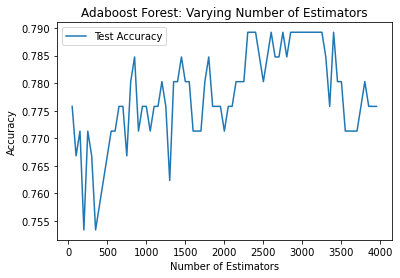

In [42]:
# adaboost forest

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

estimators = np.arange(50, 4000,50)

test_accuracy = np.empty(len(estimators))

# create Datasets

data = pd.read_csv("train.csv").fillna(0)

print(data.head)
print(len(data))

target = data["Survived"]
del data["Survived"]

#remove unsuitable columns
del data["Name"]
del data["Ticket"]
del data["Cabin"]


# encode gender and port of origin
data["Sex"] = data["Sex"].map({"female":0,"male":1})

data["Embarked"] = data["Embarked"].map({"C":0,"Q":1,"S":2})
data = data.fillna(0)

data = StandardScaler().fit_transform(data)


train_data, test_data, train_target, train_test = train_test_split(data, target, test_size=0.25,random_state = 111) # 75% training data





for i, k in enumerate(estimators):
    
    print(k)
   
    ada = AdaBoostClassifier(n_estimators=k, random_state=111)

    # Fit the classifier to the training data
    ada.fit(train_data,train_target)
    
    #Compute accuracy on the training set
    
    target_pred= ada.predict(test_data)
    
    test_accuracy[i] = metrics.accuracy_score(train_test, target_pred)
    print(test_accuracy[i])
# Generate plot
plt.title("Adaboost Forest: Varying Number of Estimators")

plt.plot(estimators, test_accuracy, label = "Test Accuracy")
plt.legend()
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.show()

In [44]:
# random forest Random Search Cross Validation

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

# from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2500, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}




test_accuracy = np.empty(len(estimators))

# create Datasets

data = pd.read_csv("train.csv").fillna(0)

print(data.head)
print(len(data))

target = data["Survived"]
del data["Survived"]

#remove unsuitable columns
del data["Name"]
del data["Ticket"]
del data["Cabin"]


# encode gender and port of origin
data["Sex"] = data["Sex"].map({"female":0,"male":1})

data["Embarked"] = data["Embarked"].map({"C":0,"Q":1,"S":2})
data = data.fillna(0)

data = StandardScaler().fit_transform(data)


train_data, test_data, train_target, train_test = train_test_split(data, target, test_size=0.25,random_state = 111) # 75% training data





# Use the random grid to search for best hyperparameters
# First create the base model to tune
forest_classifier = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest_classifier, param_distributions = random_grid, n_iter = 1000, cv = 3, verbose=2, random_state=111, n_jobs = -1)# Fit the random search model
rf_random.fit(train_data, train_target)
rf_random.best_params_

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  7.4min finished


{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [45]:
# predict new data using random Forest with 2000 Estimators
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

estimators = np.arange(50, 2000,50)

test_accuracy = np.empty(len(estimators))

# create Datasets

data = pd.read_csv("train.csv").fillna(0)

# Data to predict

to_predict =  pd.read_csv("test.csv").fillna(0)

#print(data.head)
#print(len(data))

target = data["Survived"]
del data["Survived"]

#remove unsuitable columns
del data["Name"]
del data["Ticket"]
del data["Cabin"]
#del data["Embarked"]
#del data["PassengerId"]

# encode gender
data["Sex"] = data["Sex"].map({"female":0,"male":1})

data["Embarked"] = data["Embarked"].map({"C":0,"Q":1,"S":2})
data = data.fillna(0)
data = StandardScaler().fit_transform(data)

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

train_data, test_data, train_target, train_test = train_test_split(data, target, test_size=0.25,random_state = 111) # 75% training data

forest_classifier = RandomForestClassifier(n_estimators=1000,min_samples_split=5,min_samples_leaf =1,max_features = "sqrt",max_depth = 30,bootstrap = True ,random_state = 111)

# Fit the classifier to the training data
forest_classifier.fit(train_data,train_target)
    
#Compute accuracy on the training set
    
target_pred= forest_classifier.predict(test_data)
    
test_accuracy = metrics.accuracy_score(train_test, target_pred)
print(test_accuracy)

ids = to_predict["PassengerId"].values



#remove unsuitable columns
del to_predict["Name"]
del to_predict["Ticket"]
del to_predict["Cabin"]
#del to_predict["Embarked"]
#del to_predict["PassengerId"]


# encode gender
to_predict["Sex"] = to_predict["Sex"].map({"female":0,"male":1})

to_predict["Embarked"] = to_predict["Embarked"].map({"C":0,"Q":1,"S":2})
to_predict = to_predict.fillna(0)
to_predict = StandardScaler().fit_transform(to_predict)

output = pd.DataFrame(index=[[x for x in range(0,len(ids))],[x for x in range(0,len(ids))]],columns = ["PassengerId","Survived"])


output["PassengerId"] = ids
output["Survived"] = forest_classifier.predict(to_predict)
print(output)

output.to_csv("submission_RF_optimized.csv",index=False)

0.8430493273542601
         PassengerId  Survived
0   0            892         0
1   1            893         0
2   2            894         0
3   3            895         0
4   4            896         1
...              ...       ...
413 413         1305         0
414 414         1306         1
415 415         1307         0
416 416         1308         0
417 417         1309         1

[418 rows x 2 columns]
